# Loan Approval Prediction

## 1. Data Collection.

### Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

**Import the Json Data as Pandas DataFrame**

In [3]:
df = pd.read_json(r"loan_approval_dataset.json")

**Show Top 5 Records**

In [4]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


**Shape of the dataset**

In [5]:
df.shape

(252000, 13)

**Summary of the dataset**

In [6]:
# Display summary statistics for a dataframe
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


**Check Datatypes in the dataset**

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


## 2. EXPLORING DATA

In [8]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['Id', 'Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']

We have 6 categorical features : ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']


In [9]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

Married/Single
single     89.790476
married    10.209524
Name: proportion, dtype: float64
---------------------------
House_Ownership
rented          92.023016
owned            5.126190
norent_noown     2.850794
Name: proportion, dtype: float64
---------------------------
Car_Ownership
no     69.84127
yes    30.15873
Name: proportion, dtype: float64
---------------------------
Profession
Physician                     2.363889
Statistician                  2.303968
Web_designer                  2.141667
Psychologist                  2.138889
Computer_hardware_engineer    2.131746
Drafter                       2.126587
Magistrate                    2.125794
Fashion_Designer              2.104762
Air_traffic_controller        2.095635
Comedian                      2.086905
Industrial_Engineer           2.083333
Mechanical_engineer           2.070238
Chemical_engineer             2.065476
Technical_writer              2.061508
Hotel_Manager                 2.054762
Financial_Analyst       

**Insights**
 - `Id` have unique values for each column which can be dropped as it it of no importance

## Univariate Analysis

### Numerical Features

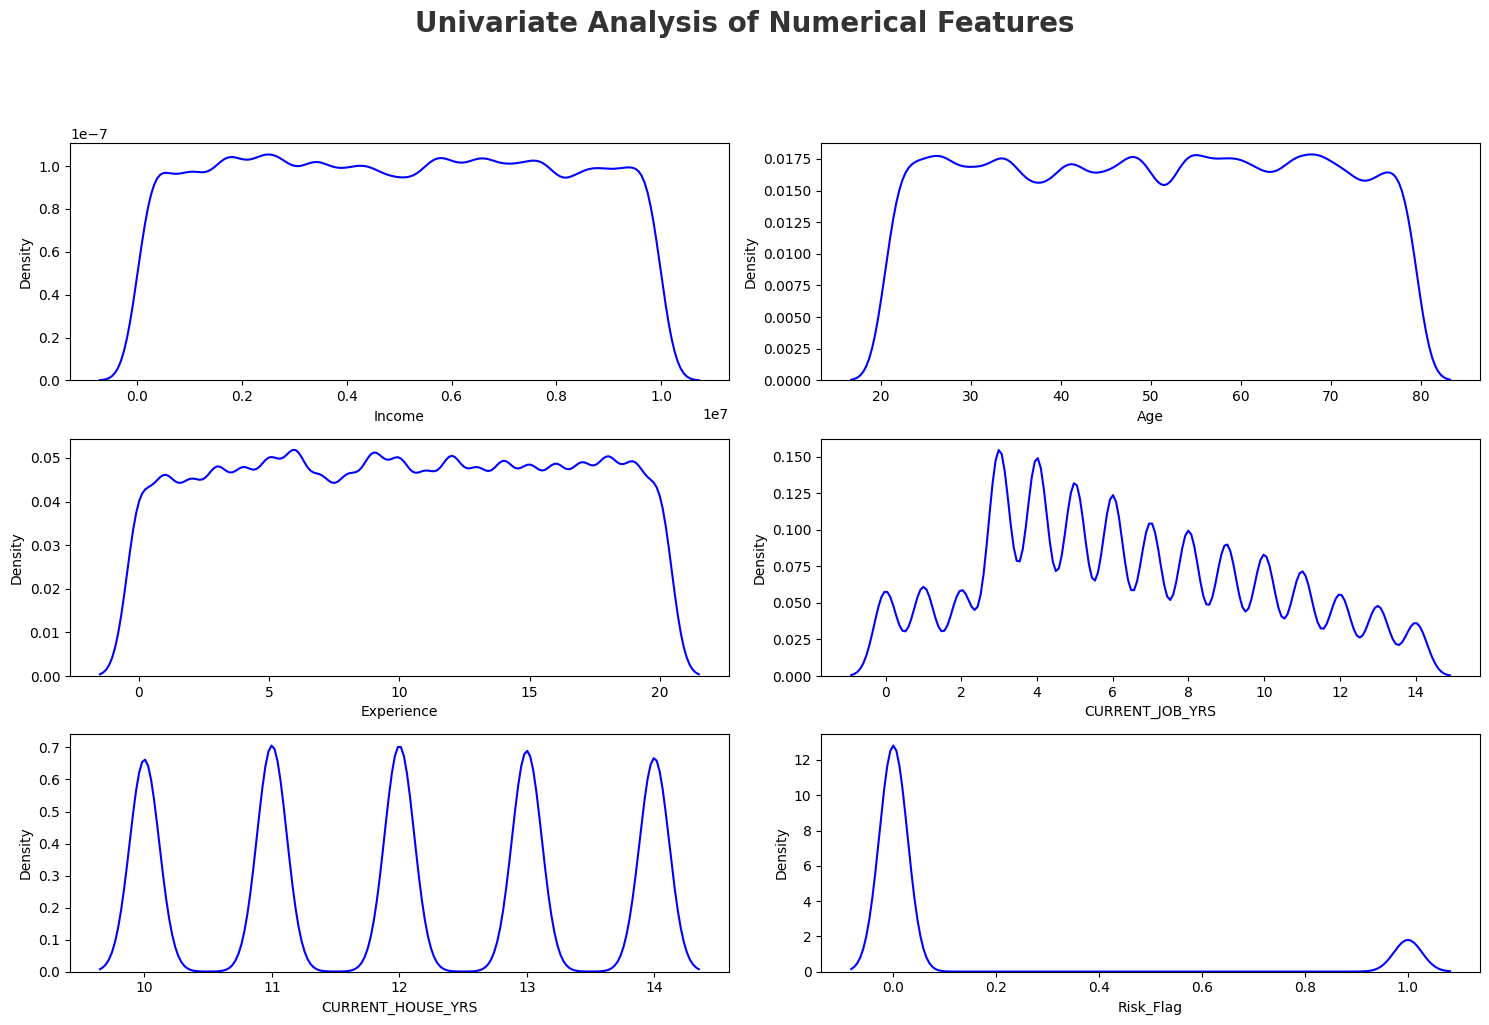

In [13]:
numeric_features.remove('Id')
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

# Adjust number of subplots based on the length of numeric_features
n_features = len(numeric_features)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate rows needed

for i in range(n_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the rect to make room for the suptitle
plt.show()

**Insights**
 - `Income`, `Age` & `Experience` column are uniformaly distributed.
 - `CURRENT_JOB_YRS` & `CURRENT_HOUSE_YRS` column looks more like multimodal curves.
 - `Risk_Flag` is right Skewed distribution.

### Categorical Features

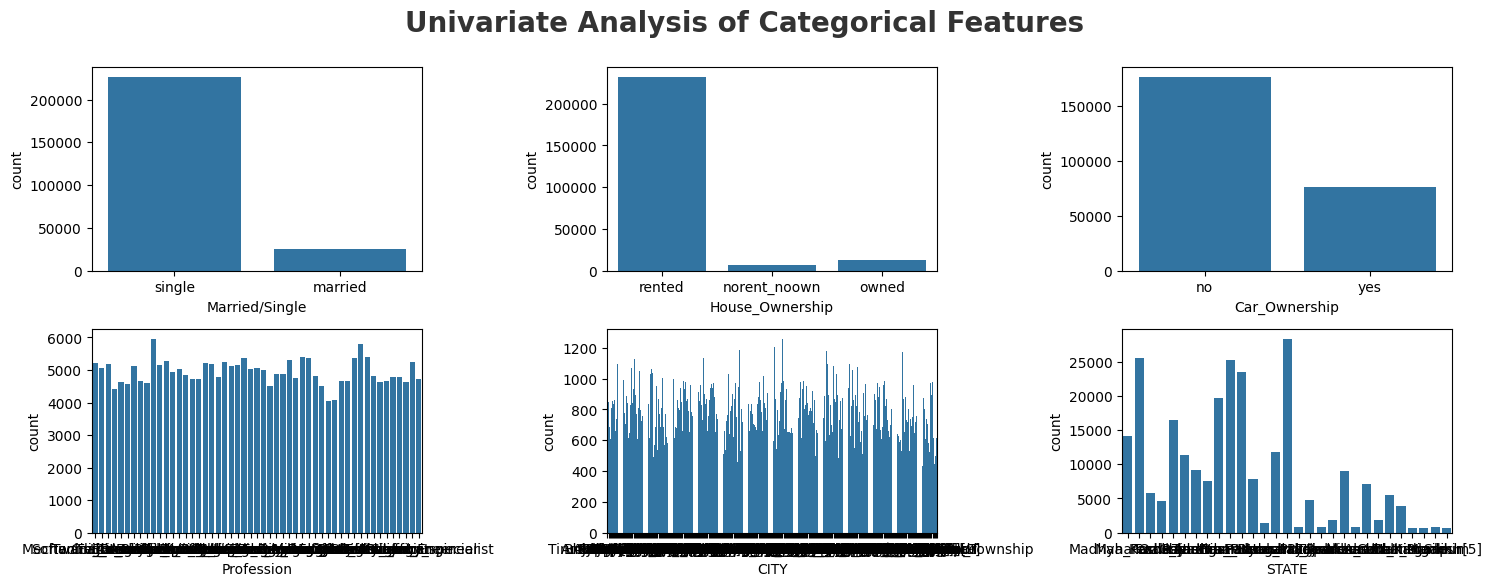

In [14]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

**Insights**
 - `Married/Single`, `House_Ownership`, and `Car_Ownership` coulmns have single category dominating.
 - In rest of the columns are balanced.

### Multivariate Analysis

In [15]:
discrete_features=[feature for feature in numeric_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 4 discrete features : ['Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']

We have 2 continuous_features : ['Income', 'Age']


### Check Multicollinearity in Numerical features

In [16]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [18]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['Risk_Flag'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,Married/Single,Reject Null Hypothesis
1,House_Ownership,Reject Null Hypothesis
2,Car_Ownership,Reject Null Hypothesis
3,Profession,Reject Null Hypothesis
4,CITY,Reject Null Hypothesis
5,STATE,Reject Null Hypothesis


**Report** 
* Every feature rejected Null Hypothesis.

### Checking Null Values

In [19]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [20]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS']


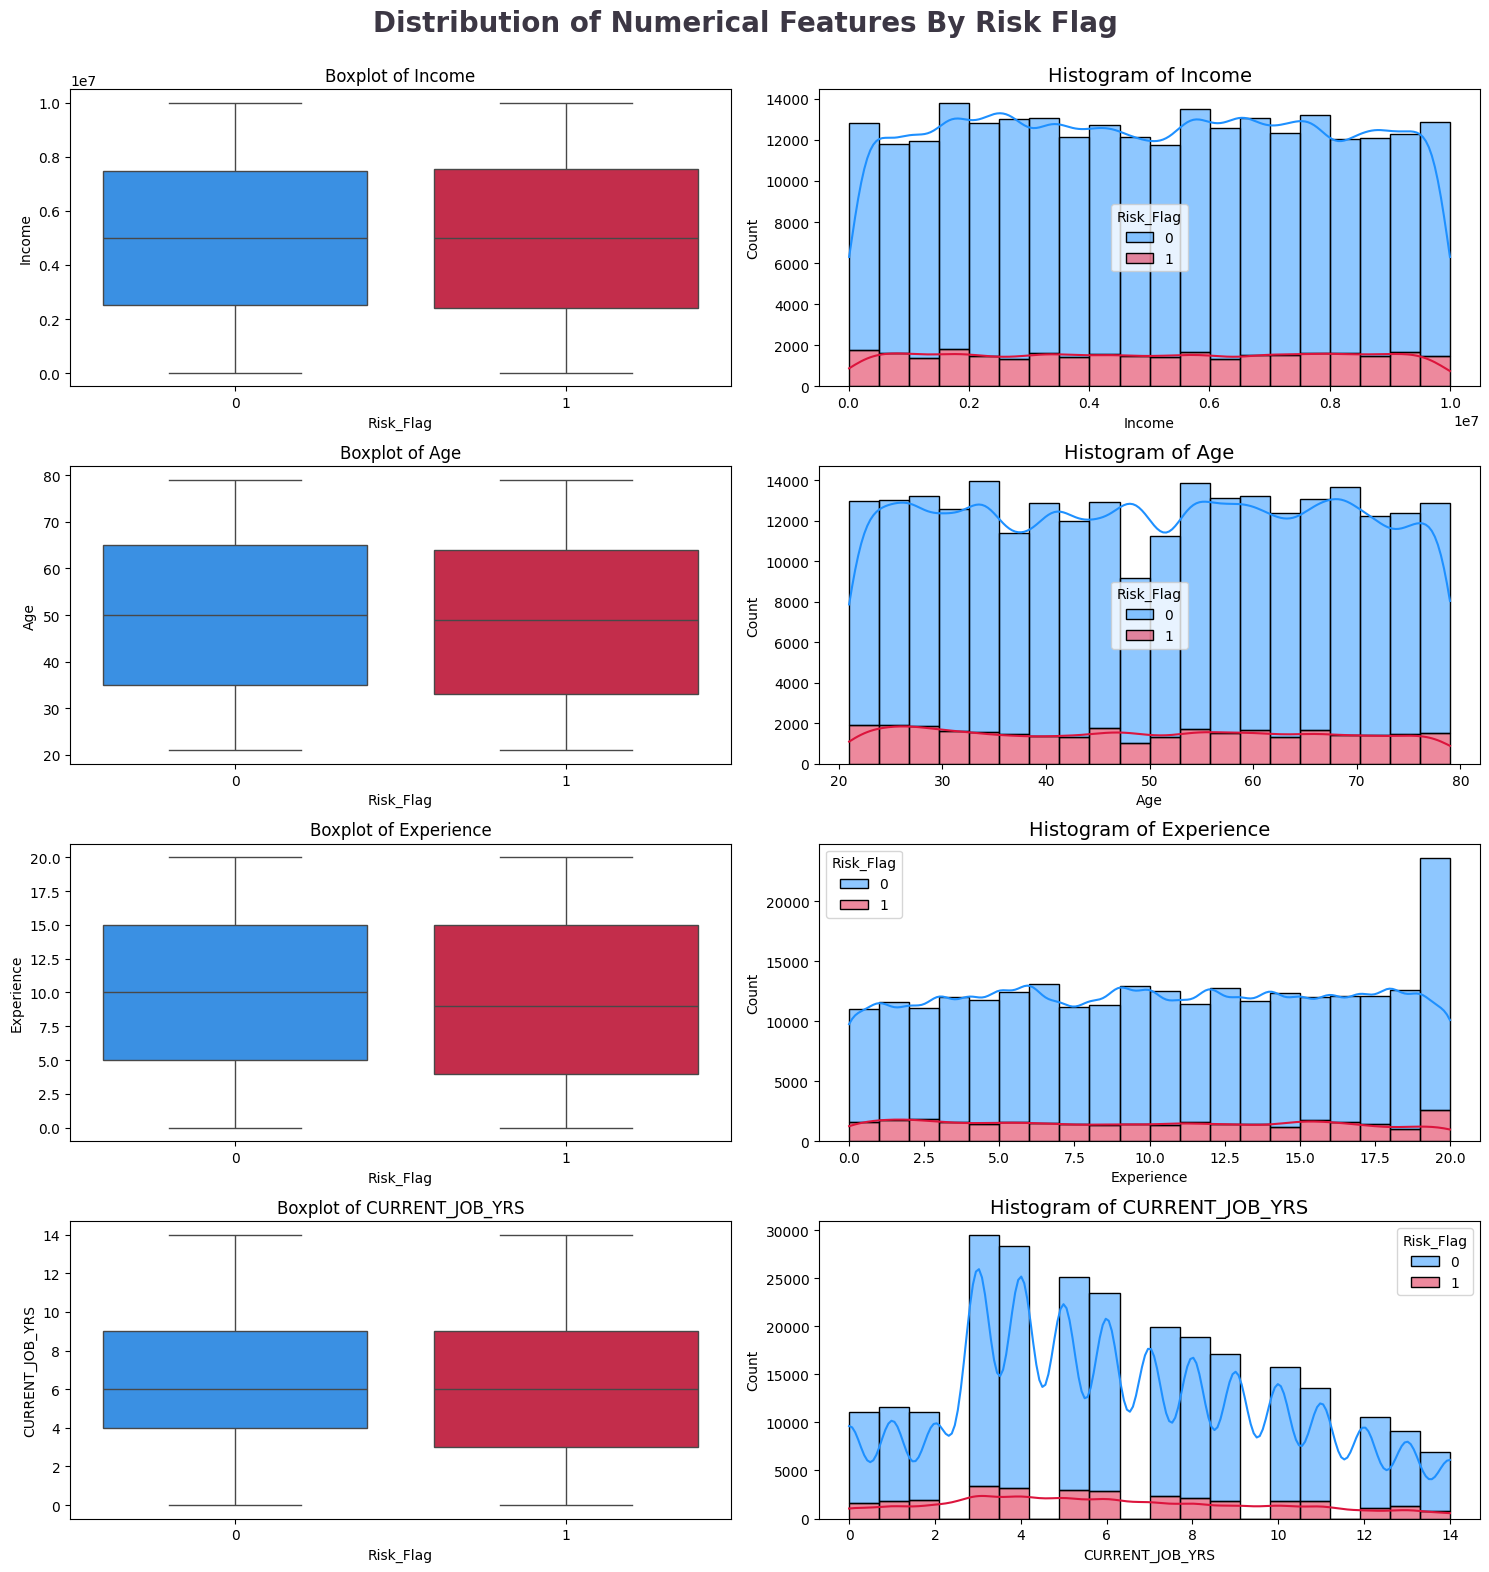

In [62]:
clr1 = ['#1E90FF', '#DC143C']
n_features = len(continues_features)
n_cols = 2
n_rows = n_features

fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
fig.suptitle('Distribution of Numerical Features By Risk Flag', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')

for i, col in enumerate(continues_features):
    sns.boxplot(data=df, x='Risk_Flag', y=col, palette=clr1, ax=ax[i, 0])
    ax[i, 0].set_title(f'Boxplot of {col}', fontsize=12)

    sns.histplot(data=df, x=col, hue='Risk_Flag', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i, 1])
    ax[i, 1].set_title(f'Histogram of {col}', fontsize=14)

fig.tight_layout()
fig.subplots_adjust(top=0.93)

plt.show()

## Initial Analysis Report

 - `Id` have unique vlaues for each column which can be dropped as it it of no importance
 - `Income`, `Age` & `Experience` column are uniformaly distributed.
 - `CURRENT_JOB_YRS` & `CURRENT_HOUSE_YRS` column looks more like multimodal curves.
 - `Risk_Flag` is right Skewed distribution.
 - `Risk_Flag` column is the target to predict.
 - There are No missing values in the dataset.

## 3. Visualization

### Visualize the Target Feature

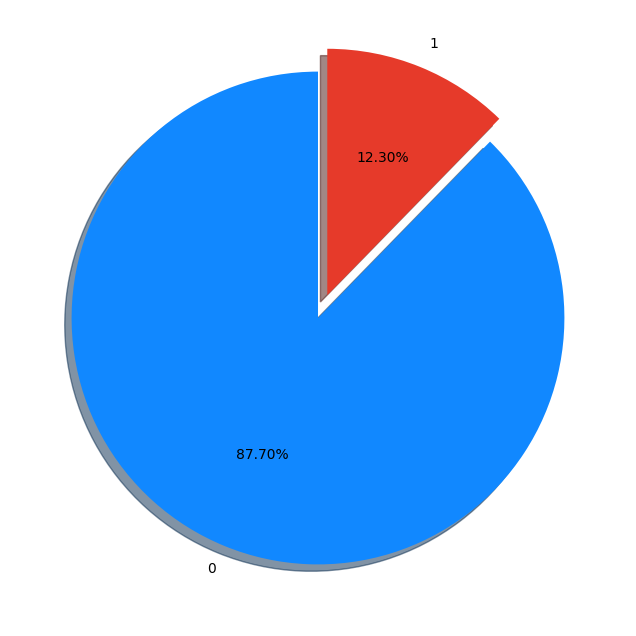

In [63]:
percentage = df.Risk_Flag.value_counts(normalize=True)*100
labels = ["0","1"]

fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

* From the chart it is seen that the Target Variable is Imbalanced
 - 87.70%  and 15% this is a significant imbalance, and we need to handle it before proceeding with the model building.

### Does client income has any impact on Risk Flag ?

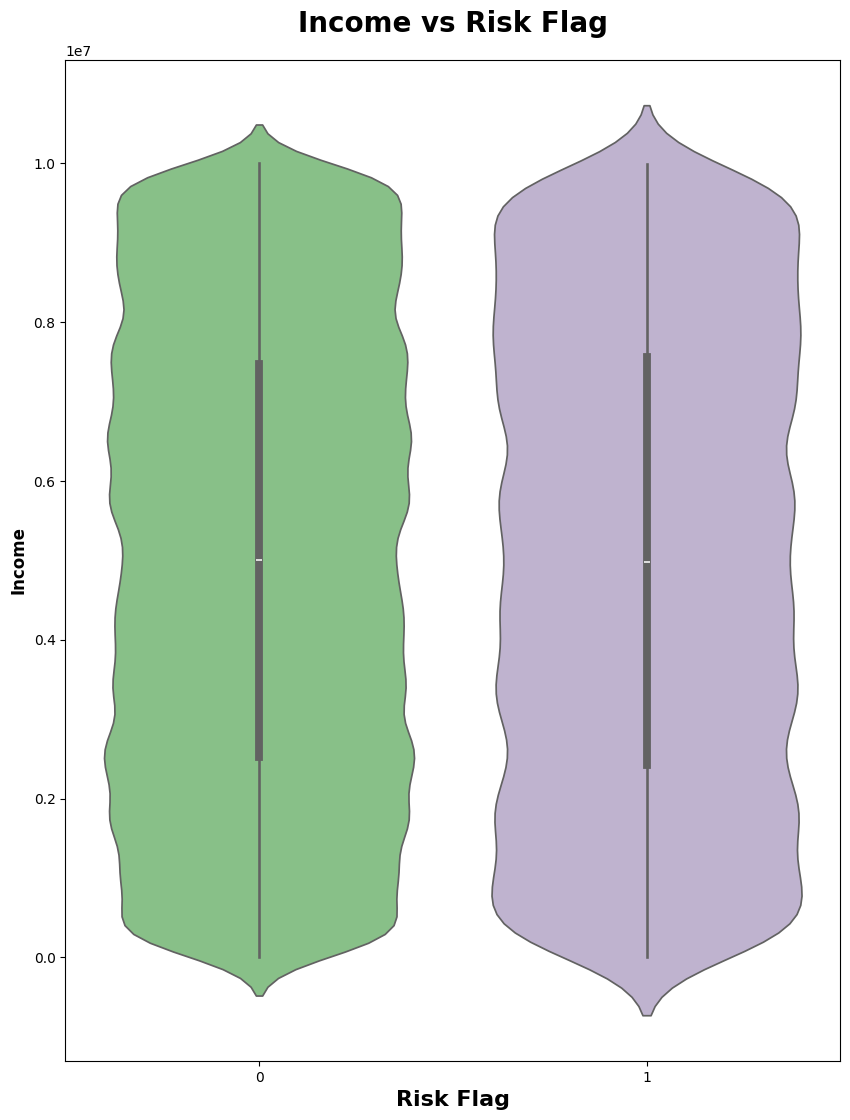

In [35]:
plt.subplots(figsize=(10,13))
sns.violinplot(x="Risk_Flag",y='Income', data=df, palette="Accent")
plt.title("Income vs Risk Flag", weight="bold",fontsize=20, pad=20)
plt.ylabel("Income", weight="bold", fontsize=12)
plt.xlabel("Risk Flag", weight="bold", fontsize=16)
plt.ylim()
plt.show()

**Insights**
 - The distrubution of both is similar.

### Does client age has any impact on Risk Flag ? 

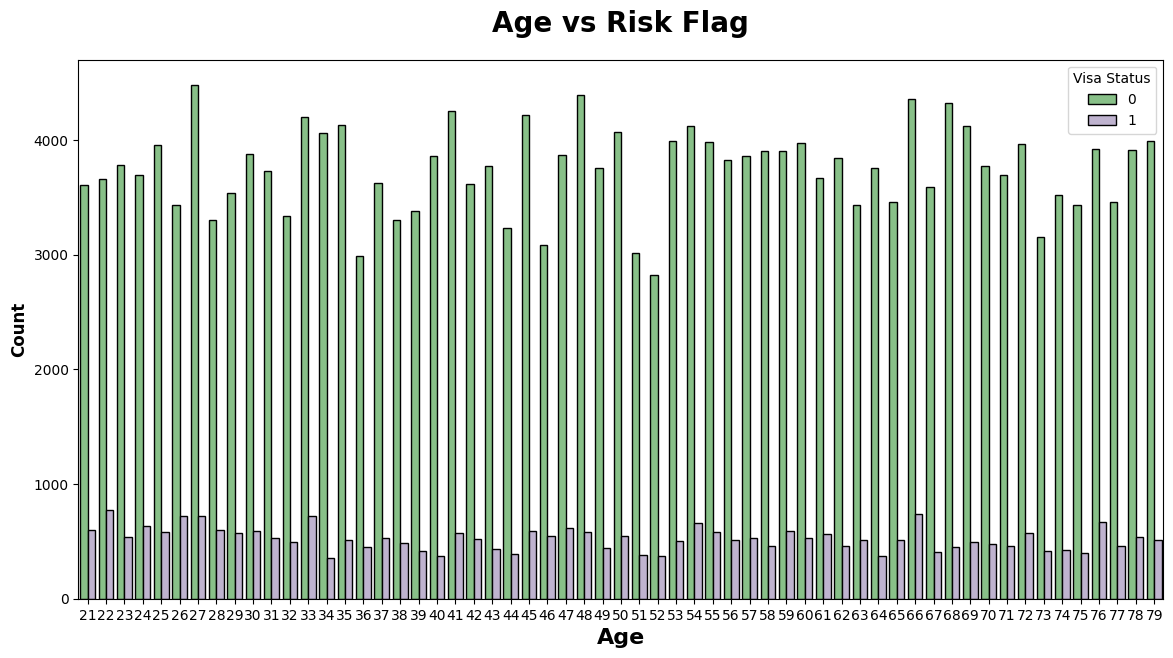

In [42]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Age",hue="Risk_Flag", data=df, ec = "black",palette="Accent")
plt.title("Age vs Risk Flag", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Age", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

**Insights**
- Age does not have much of impact on Risk Flag

### Does client's experience has any impact on Risk Flag ?

In [41]:
#group data by experience and risk flag
df.groupby('Experience')['Risk_Flag'].value_counts(normalize=True).to_frame()*100

proportion
Experience Risk_Flag            
0          0           85.674183
           1           14.325817
1          0           84.431965
           1           15.568035
2          0           82.953008
           1           17.046992
3          0           86.858895
           1           13.141105
4          0           87.727619
           1           12.272381
5          0           87.420625
           1           12.579375
6          0           88.166895
           1           11.833105
7          0           87.508903
           1           12.491097
8          0           88.246696
           1           11.753304
9          0           88.721398
           1           11.278602
10         0           89.482524
           1           10.517476
11         0           86.164731
           1           13.835269
12         0           89.093750
           1           10.906250
13         0           87.782805
           1           12.217195
14         0           90.201310
           1            9.798690
15         0           84.924539
           1           15.075461
16         0           86.783413
           1           13.216587
17         0           88.418102
           1           11.581898
18         0           91.833981
           1            8.166019
19         0           89.379018
           1           10.620982
20         0           88.687225
           1           11.312775

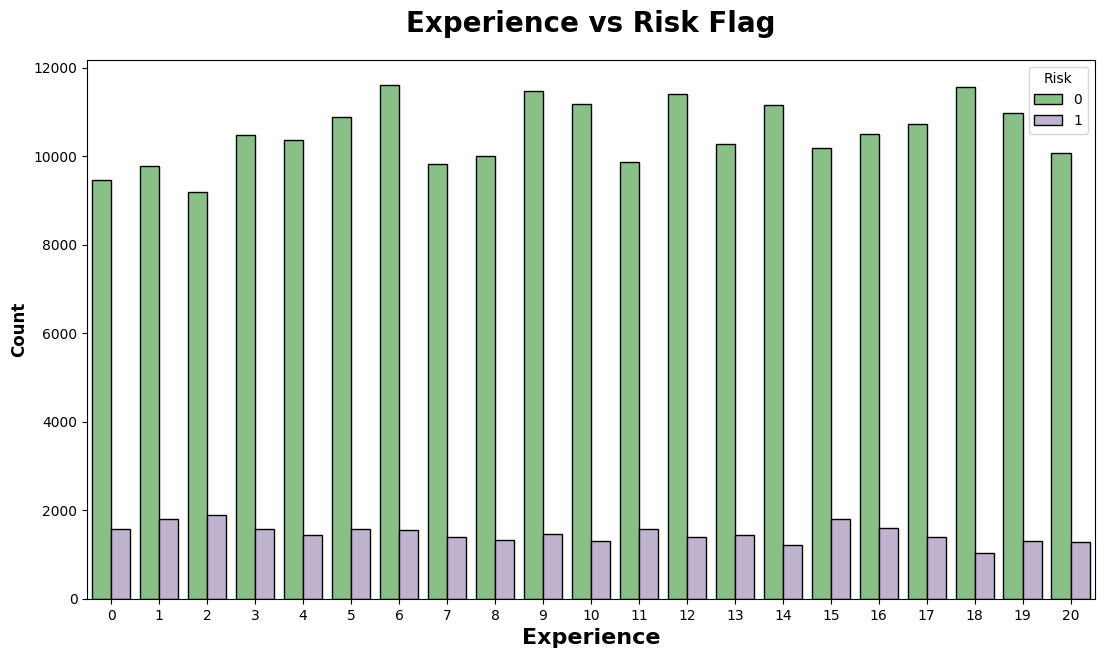

In [43]:
plt.subplots(figsize=(13,7))
sns.countplot(x="Experience",hue="Risk_Flag", data=df, ec= "black",palette="Accent")
plt.title("Experience vs Risk Flag", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Experience", weight="bold", fontsize=16)
plt.legend(title="Risk", fancybox=True)
plt.show()

**Report**
* Risk Flag is Normally distributed for high risk and low risk

###  Client married or single, does it make any impact on Risk Flag?

In [44]:
#group data by married status and count risk flag
df.groupby('Married/Single')['Risk_Flag'].value_counts(normalize=True).to_frame()*100

proportion
Married/Single Risk_Flag            
married        0           89.754353
               1           10.245647
single         0           87.466412
               1           12.533588

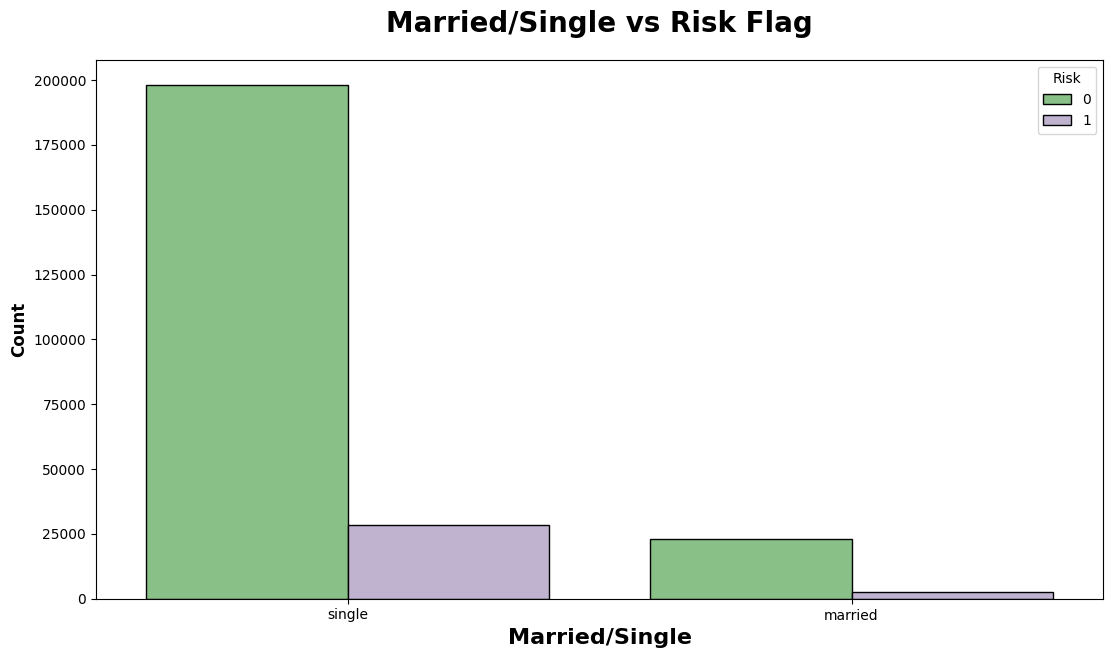

In [45]:
plt.subplots(figsize=(13,7))
sns.countplot(x="Married/Single",hue="Risk_Flag", data=df, ec= "black",palette="Accent")
plt.title("Married/Single vs Risk Flag", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Married/Single", weight="bold", fontsize=16)
plt.legend(title="Risk", fancybox=True)
plt.show()

**Report**
* Single status has low risk compared to married status.

### Does house ownership has any impact on Visa status?

In [47]:
#group data by house ownership and count risk flag
df.groupby('House_Ownership')['Risk_Flag'].value_counts(normalize=True).to_frame()*100

proportion
House_Ownership Risk_Flag            
norent_noown    0           90.047327
                1            9.952673
owned           0           91.020282
                1            8.979718
rented          0           87.442324
                1           12.557676

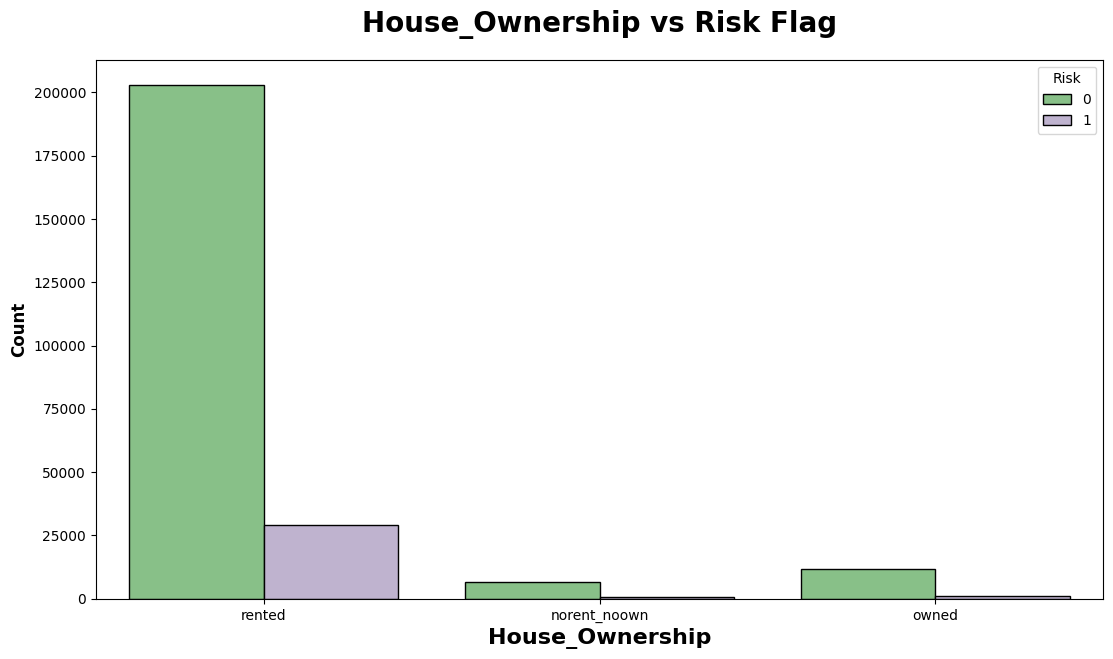

In [48]:
plt.subplots(figsize=(13,7))
sns.countplot(x="House_Ownership",hue="Risk_Flag", data=df, ec= "black",palette="Accent")
plt.title("House_Ownership vs Risk Flag", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("House_Ownership", weight="bold", fontsize=16)
plt.legend(title="Risk", fancybox=True)
plt.show()

**Insights**
 - Rented clients are higher in number compared to other clients. 
 - rented clients are lower risk.

### car ownership and its impact on risk flag

In [49]:
#group data by car ownership and count risk flag
df.groupby('Car_Ownership')['Risk_Flag'].value_counts(normalize=True).to_frame()*100

proportion
Car_Ownership Risk_Flag            
no            0           87.181250
              1           12.818750
yes           0           88.901316
              1           11.098684

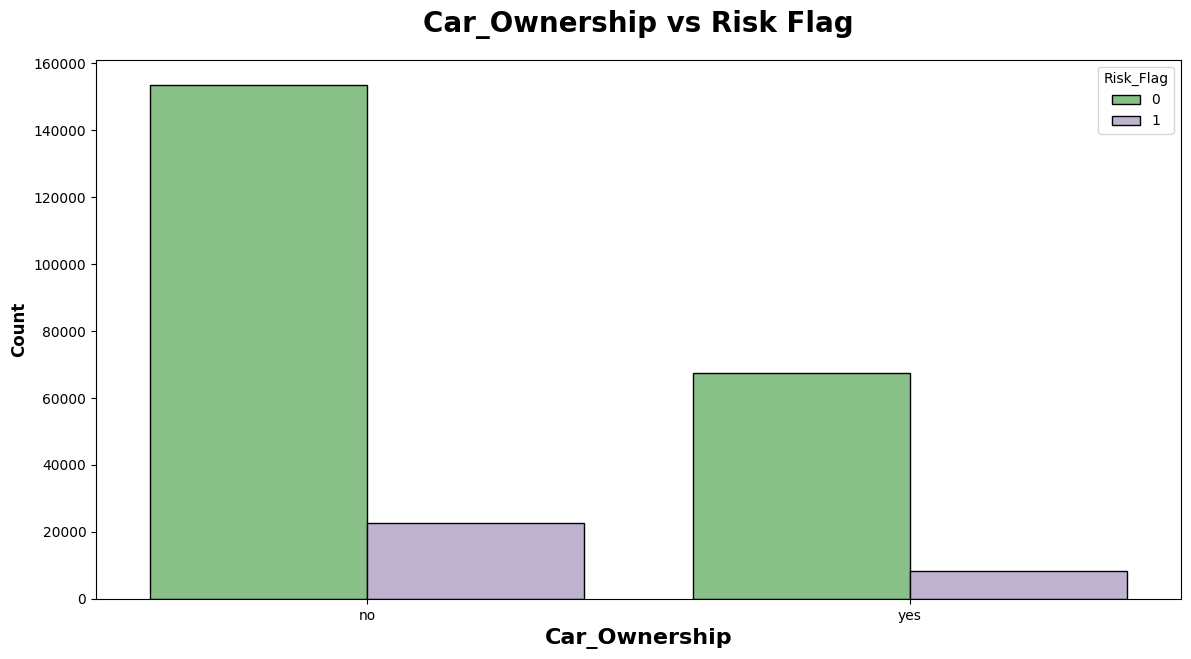

In [50]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Car_Ownership",hue="Risk_Flag", data=df,ec='k', palette='Accent')
plt.title("Car_Ownership vs Risk Flag", weight="bold",fontsize=20, pad=20)
plt.xlabel("Car_Ownership", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

**Report**
* clients who does not own cars are higher in numbers.
* High risk is also high of people who does not own cars.

### Does profession has impact on risk ?

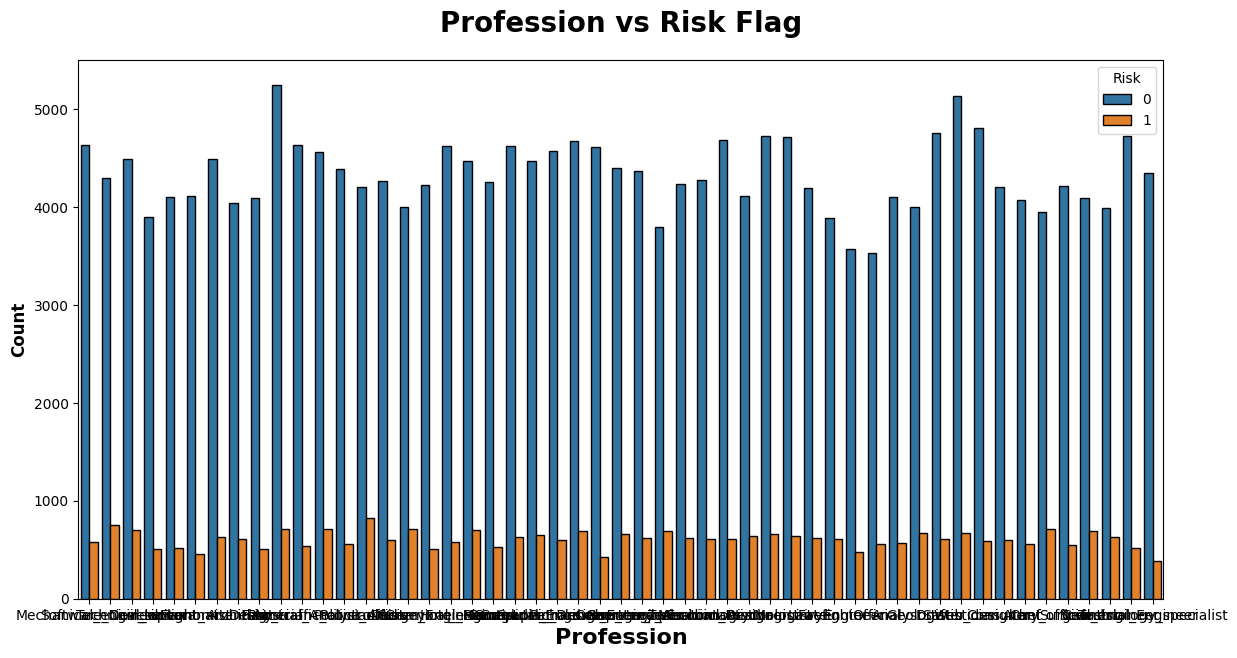

In [52]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Profession",hue="Risk_Flag", data=df,ec='k')
plt.title("Profession vs Risk Flag", weight="bold",fontsize=20, pad=20)
plt.xlabel("Profession", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Risk", fancybox=True)
plt.show()

### Does city has any impact on risk flag ?

In [55]:
df.groupby('CITY')['Risk_Flag'].value_counts(normalize=True).to_frame()*100

proportion
CITY             Risk_Flag            
Adoni            0           89.192025
                 1           10.807975
Agartala         0           83.189122
                 1           16.810878
Agra             0           91.996047
...                                ...
Visakhapatnam[4] 1           14.521112
Warangal[11][12] 0           94.553377
                 1            5.446623
Yamunanagar      0           85.432473
                 1           14.567527

[634 rows x 1 columns]

#### does state have any impact on risk flag ?

In [56]:
df.groupby('STATE')['Risk_Flag'].value_counts(normalize=True).to_frame()*100

proportion
STATE             Risk_Flag            
Andhra_Pradesh    0           88.397834
                  1           11.602166
Assam             0           86.830926
                  1           13.169074
Bihar             0           86.941355
                  1           13.058645
Chandigarh        0           90.701220
                  1            9.298780
Chhattisgarh      0           86.671883
                  1           13.328117
Delhi             0           89.544627
                  1           10.455373
Gujarat           0           88.227560
                  1           11.772440
Haryana           0           87.579214
                  1           12.420786
Himachal_Pradesh  0           86.674670
                  1           13.325330
Jammu_and_Kashmir 0           84.101124
                  1           15.898876
Jharkhand         0           86.670385
                  1           13.329615
Karnataka         0           89.970477
                  1           10.029523
Kerala            0           83.290267
                  1           16.709733
Madhya_Pradesh    0           84.563093
                  1           15.436907
Maharashtra       0           88.674595
                  1           11.325405
Manipur           0           78.445230
                  1           21.554770
Mizoram           0           88.928151
                  1           11.071849
Odisha            0           85.744955
                  1           14.255045
Puducherry        0           88.346127
                  1           11.653873
Punjab            0           90.995763
                  1            9.004237
Rajasthan         0           85.916721
                  1           14.083279
Sikkim            0           95.394737
                  1            4.605263
Tamil_Nadu        0           89.683739
                  1           10.316261
Telangana         0           86.988304
                  1           13.011696
Tripura           0           83.189122
                  1           16.810878
Uttar_Pradesh     0           88.228873
                  1           11.771127
Uttar_Pradesh[5]  0           86.944818
                  1           13.055182
Uttarakhand       0           92.902882
                  1            7.097118
West_Bengal       0           87.186475
                  1           12.813525

#### Does current Job year have any impact on risk flag ?

In [58]:
df.groupby('CURRENT_JOB_YRS')['Risk_Flag'].value_counts(normalize=True).to_frame()*100

proportion
CURRENT_JOB_YRS Risk_Flag            
0               0           85.674183
                1           14.325817
1               0           84.431965
                1           15.568035
2               0           82.953008
                1           17.046992
3               0           88.421589
                1           11.578411
4               0           88.683440
                1           11.316560
5               0           88.155115
                1           11.844885
6               0           87.782555
                1           12.217445
7               0           88.230866
                1           11.769134
8               0           88.444421
                1           11.555579
9               0           89.201494
                1           10.798506
10              0           88.077118
                1           11.922882
11              0           86.745127
                1           13.254873
12              0           89.476662
                1           10.523338
13              0           86.031432
                1           13.968568
14              0           88.186813
                1           11.813187

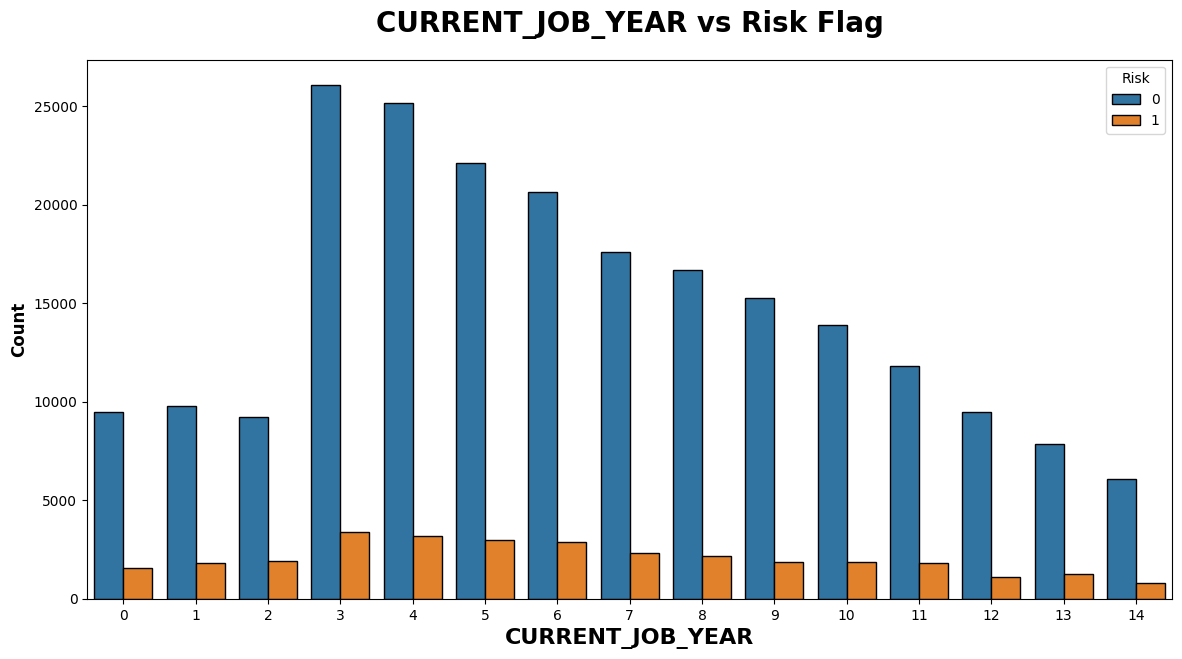

In [59]:
plt.subplots(figsize=(14,7))
sns.countplot(x="CURRENT_JOB_YRS",hue="Risk_Flag", data=df,ec='k')
plt.title("CURRENT_JOB_YEAR vs Risk Flag", weight="bold",fontsize=20, pad=20)
plt.xlabel("CURRENT_JOB_YEAR", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Risk", fancybox=True)
plt.show()

#### Does current house year has any impact on risk flag ? 

In [60]:
df.groupby('CURRENT_HOUSE_YRS')['Risk_Flag'].value_counts(normalize=True).to_frame()*100

proportion
CURRENT_HOUSE_YRS Risk_Flag            
10                0           87.504623
                  1           12.495377
11                0           87.502169
                  1           12.497831
12                0           87.828001
                  1           12.171999
13                0           87.796838
                  1           12.203162
14                0           87.868090
                  1           12.131910

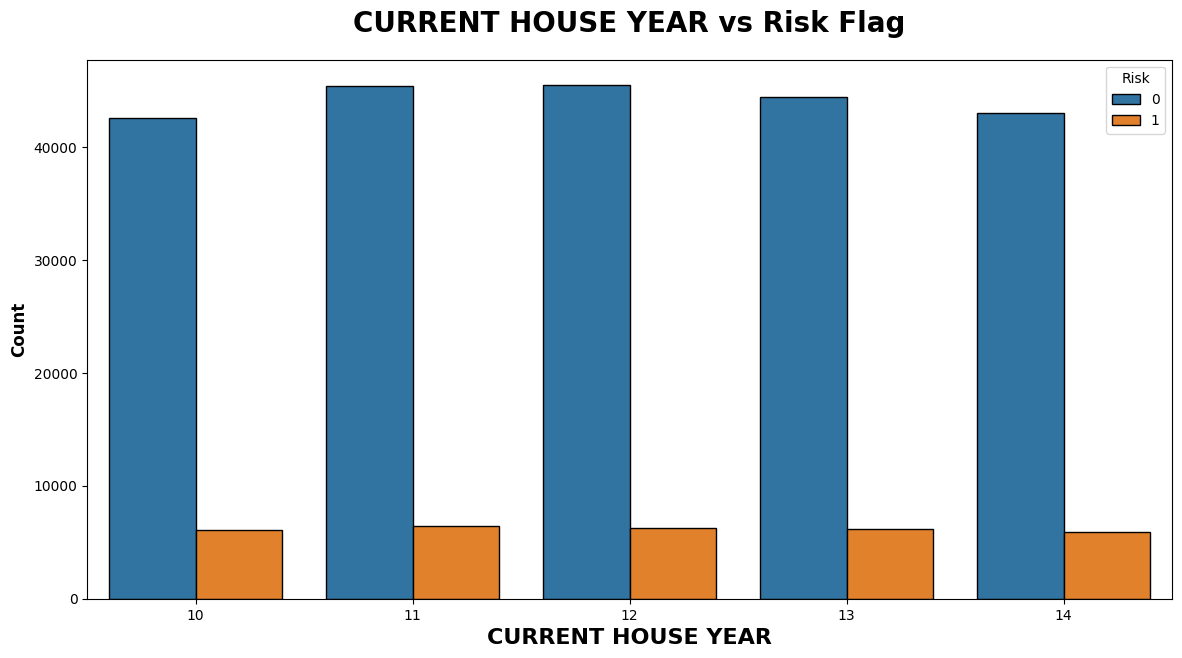

In [61]:
plt.subplots(figsize=(14,7))
sns.countplot(x="CURRENT_HOUSE_YRS",hue="Risk_Flag", data=df,ec='k')
plt.title("CURRENT HOUSE YEAR vs Risk Flag", weight="bold",fontsize=20, pad=20)
plt.xlabel("CURRENT HOUSE YEAR", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Risk", fancybox=True)
plt.show()

### Final Report 
* `Id` column can be dropped as it is an ID.
* The dataset does not have outliers and clearn to use.
* Target column `case_status` is imbalanced can be handled before model building.